In [117]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
import scipy.spatial, scipy.linalg
from scipy.spatial.distance import pdist
import scipy.sparse.linalg
from scipy.linalg import eigh
import zipfile,io
import pandas as pd
import zipfile
import re
import time
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline


## 8.1 Simulated Annealing

imulated annealing can be used to optimize a cost function $E : s \rightarrow R$ where the state s is a set of discrete state variables $s_i \in (−1, +1), i = 1,...., N$ . For a fully connected “network” with $N = 6$ binary nodes, this means that $s \in  (−1, +1)^6$, and we will use the cost (“energy”)

In [138]:
def E(s,W):
    return -(s*np.dot(W,s)).sum(0)/2

def Es(si,s,i,W):
    return -(si*np.dot(W,s)[i])/2


def flipP(k,i,s,beta,W):
    ns = np.array(s)
    de = Es(s[i],s,i,W)-Es(s[k],s,k,W)
    pr=(1/(1+np.exp(beta*de)))[0]
    W[i,k]=pr
    W[k,i]=pr
    if(np.random.choice([True,False],1,p=[pr,1-pr])):
        ns[i]=s[k]
        ns[k]=s[i]
    return ns,W

### Initialization:

In [144]:
M =[1,500]
s = np.random.choice([-1,1],6)
W=np.ones((6,6))*0.5
W = W-np.diag(np.diag(W))
beta = 1.3
tau = 1.02
t_max = 100

In [145]:
s

array([-1,  1, -1,  1, -1, -1])

### Optimization: M=1

In [146]:
beta = 2
Tm1 = np.empty(t_max)
Em1 = np.empty(t_max)
Wm1 = np.empty((t_max,6,6))
sm1 = np.empty((t_max,6))
for t in range(t_max):
    Tm1[t]=1/beta
    k = t%6
    for m in range(M[0]):
        i = np.random.choice(np.setdiff1d(np.arange(6),np.array([k])),1)
        s,W=flipP(k,i,s,beta,W)
    Em1[t]= E(s,W)
    sm1[t] = s
    Wm1[t] = W
    beta = beta*tau

In [147]:
sm1

array([[-1.,  1., -1.,  1., -1., -1.],
       [-1., -1., -1.,  1.,  1., -1.],
       [-1., -1., -1.,  1.,  1., -1.],
       [ 1., -1., -1., -1.,  1., -1.],
       [ 1., -1., -1., -1.,  1., -1.],
       [ 1., -1., -1., -1.,  1., -1.],
       [ 1., -1., -1., -1.,  1., -1.],
       [ 1., -1., -1., -1.,  1., -1.],
       [ 1., -1., -1., -1.,  1., -1.],
       [ 1., -1., -1., -1.,  1., -1.],
       [ 1., -1., -1., -1.,  1., -1.],
       [ 1., -1., -1., -1.,  1., -1.],
       [-1.,  1., -1., -1.,  1., -1.],
       [-1., -1.,  1., -1.,  1., -1.],
       [-1., -1., -1., -1.,  1.,  1.],
       [-1., -1., -1., -1.,  1.,  1.],
       [-1., -1., -1., -1.,  1.,  1.],
       [ 1., -1., -1., -1.,  1., -1.],
       [-1.,  1., -1., -1.,  1., -1.],
       [-1., -1., -1., -1.,  1.,  1.],
       [-1., -1., -1., -1.,  1.,  1.],
       [-1., -1., -1., -1.,  1.,  1.],
       [-1., -1.,  1., -1., -1.,  1.],
       [-1., -1.,  1.,  1., -1., -1.],
       [-1., -1.,  1.,  1., -1., -1.],
       [-1., -1.,  1.,  1

### Plotting: M=1

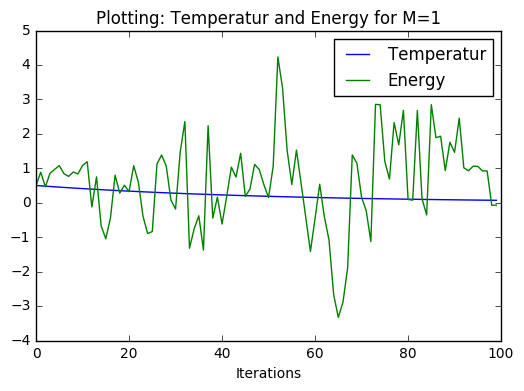

In [148]:
plt.plot((np.arange(t_max)),Tm1,label='Temperatur')
plt.plot((np.arange(t_max)),Em1,label='Energy')
plt.legend()
plt.title("Plotting: Temperatur and Energy for M=1")
plt.xlabel('Iterations')

### Initialization:

In [168]:
M =[1,500]
s = np.random.choice([-1,1],6)
W=np.random.randn(6,6)*np.tri(6)
W =W-np.diag(np.diag(W))
W =W+W.T
beta = 1.2
tau = 1.01
t_max = 60

In [169]:
s

array([-1,  1, -1,  1, -1,  1])

### Optimization: M=500

In [170]:
beta = 2
Tm500 = np.empty(t_max)
Em500 = np.empty(t_max)
Wm500 = np.empty((t_max,6,6))
sm500 = np.empty((t_max,6))
for t in range(t_max):
    Tm500[t]=1/beta
    k = t%6
    for m in range(M[1]):
        i = np.random.choice(np.setdiff1d(np.arange(6),np.array([k])),1)
        s,W=flipP(k,i,s,beta,W)
    Em500[t]= E(s,W)
    Wm500[t] = W
    sm500[t] =s
    beta = beta*tau

In [171]:
sm500

array([[ 1., -1., -1.,  1., -1.,  1.],
       [-1.,  1., -1.,  1., -1.,  1.],
       [-1.,  1.,  1., -1.,  1., -1.],
       [-1.,  1., -1., -1.,  1.,  1.],
       [-1.,  1., -1.,  1., -1.,  1.],
       [-1.,  1., -1.,  1.,  1., -1.],
       [-1.,  1., -1.,  1., -1.,  1.],
       [ 1.,  1., -1.,  1., -1., -1.],
       [-1.,  1.,  1.,  1., -1., -1.],
       [-1., -1.,  1.,  1., -1.,  1.],
       [ 1., -1.,  1.,  1., -1., -1.],
       [-1.,  1., -1., -1.,  1.,  1.],
       [ 1.,  1., -1.,  1., -1., -1.],
       [-1., -1.,  1.,  1.,  1., -1.],
       [-1.,  1.,  1., -1., -1.,  1.],
       [-1.,  1., -1.,  1., -1.,  1.],
       [-1.,  1.,  1., -1.,  1., -1.],
       [ 1., -1.,  1.,  1., -1., -1.],
       [ 1., -1., -1.,  1.,  1., -1.],
       [ 1., -1.,  1.,  1., -1., -1.],
       [-1., -1.,  1.,  1., -1.,  1.],
       [ 1., -1., -1., -1.,  1.,  1.],
       [ 1.,  1., -1.,  1., -1., -1.],
       [-1., -1.,  1.,  1., -1.,  1.],
       [ 1.,  1., -1., -1.,  1., -1.],
       [-1., -1., -1.,  1

### Plotting: M=500

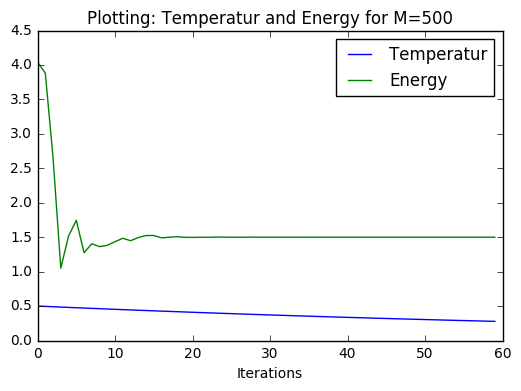

In [172]:
plt.plot((np.arange(t_max)),Tm500,label='Temperatur')
plt.plot((np.arange(t_max)),Em500,label='Energy')
plt.legend()
plt.title("Plotting: Temperatur and Energy for M=500")
plt.xlabel('Iterations')

### Plotting:  the energy $E(s)$ for all possible $2^2$

In [173]:
nW=Wm500[np.argmin(Em500)]

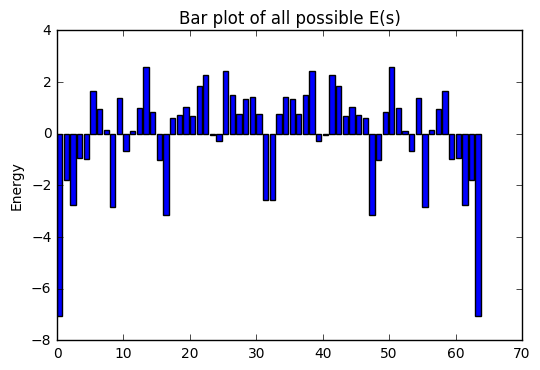

In [174]:
s_ite = np.array(list(it.product([-1,1], repeat=6))).T
all_s=E(s_ite,nW)
plt.bar(range(len(all_s)),all_s)
plt.title('Bar plot of all possible E(s)')
plt.ylabel('Energy')

In [175]:
def P(s, W,beta):
    Z= np.exp(-beta*E(s,W)).sum()
    return np.exp(-beta*E(s,W))/Z


### Plot the probabilities P(s) for different β as a bar

In [176]:
np.linspace(1.0,1.2,10)

array([ 1.        ,  1.02222222,  1.04444444,  1.06666667,  1.08888889,
        1.11111111,  1.13333333,  1.15555556,  1.17777778,  1.2       ])

In [177]:
nW

array([[ 0.        ,  0.58753102,  0.42627252,  0.68163355,  0.06908853,
         0.4759017 ],
       [ 0.58753102,  0.        ,  0.33509706,  0.55365646,  0.09713258,
         0.37667891],
       [ 0.42627252,  0.33509706,  0.        ,  0.56176849,  0.53153862,
         0.26213459],
       [ 0.68163355,  0.55365646,  0.56176849,  0.        ,  0.58324532,
         0.65747245],
       [ 0.06908853,  0.09713258,  0.53153862,  0.58324532,  0.        ,
         0.86199289],
       [ 0.4759017 ,  0.37667891,  0.26213459,  0.65747245,  0.86199289,
         0.        ]])

1.0001
1.22453333333
1.44896666667
1.6734
1.89783333333
2.12226666667
2.3467
2.57113333333
2.79556666667
3.02


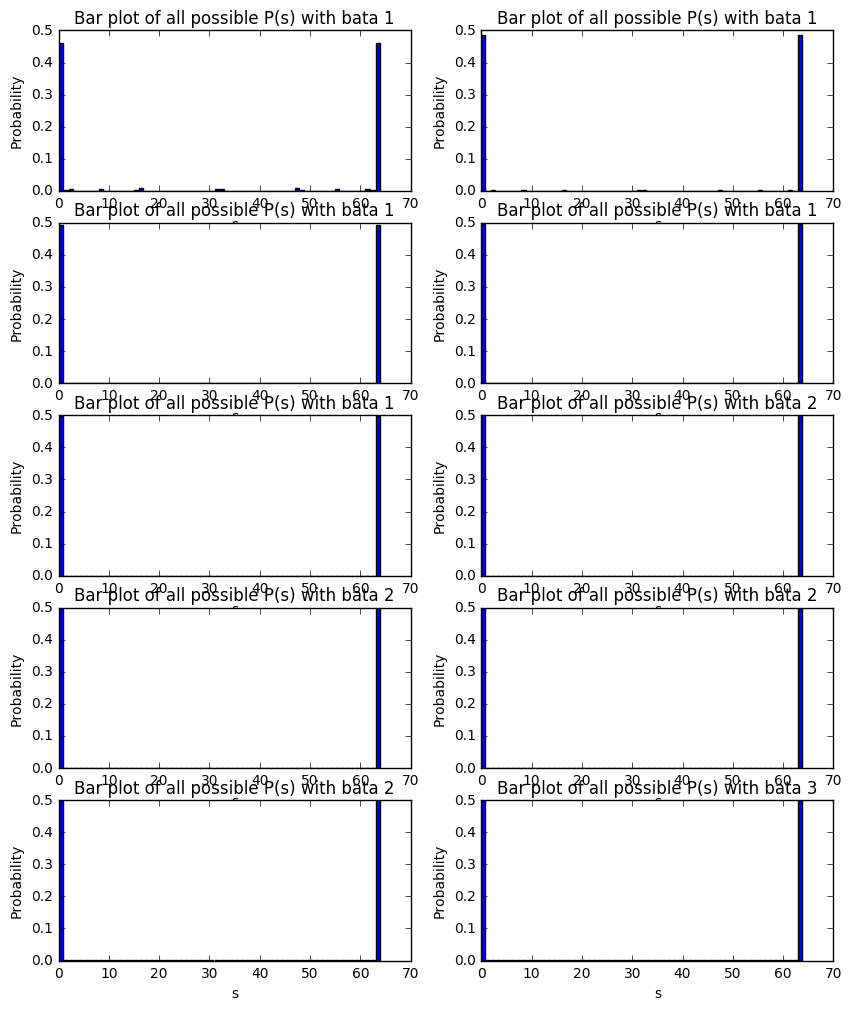

In [178]:
betaset=np.linspace(1.0001,3.020,10)
plt.figure(figsize=(10,12))
ite=1
for i in betaset:
    plt.subplot(5,2,ite)
    print(i)
    prob = P(s_ite , nW,i)
    plt.bar(range(len(prob)),prob)
    plt.title('Bar plot of all possible P(s) with bata %i'%i)
    plt.xlabel('s')
    plt.ylabel('Probability')
    ite = ite+1

In [161]:
s_ite[:,np.argsort(-prob)[:2]]

array([[-1,  1],
       [-1,  1],
       [-1,  1],
       [-1,  1],
       [-1,  1],
       [-1,  1]])

In [162]:
np.argsort(-prob)[:2]

array([ 0, 63])